# The Simple Regression Model

In [1]:
import pandas as pd
import numpy as np
import wooldridge
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wooldridge.data()

  J.M. Wooldridge (2019) Introductory Econometrics: A Modern Approach,
  Cengage Learning, 6th edition.

  401k       401ksubs    admnrev       affairs     airfare
  alcohol    apple       approval      athlet1     athlet2
  attend     audit       barium        beauty      benefits
  beveridge  big9salary  bwght         bwght2      campus
  card       catholic    cement        census2000  ceosal1
  ceosal2    charity     consump       corn        countymurders
  cps78_85   cps91       crime1        crime2      crime3
  crime4     discrim     driving       earns       econmath
  elem94_95  engin       expendshares  ezanders    ezunem
  fair       fertil1     fertil2       fertil3     fish
  fringe     gpa1        gpa2          gpa3        happiness
  hprice1    hprice2     hprice3       hseinv      htv
  infmrt     injury      intdef        intqrt      inven
  jtrain     jtrain2     jtrain3       kielmc      lawsch85
  loanapp    lowbrth     mathpnl       meap00_01   meap01
  meap93    

## Examples

In [3]:
ceosal1 = wooldridge.data('ceosal1')
wage1 = wooldridge.data('wage1')
vote1 = wooldridge.data('vote1')
meap93 = wooldridge.data('meap93')
jtrain2 = wooldridge.data('jtrain2')

### 2.1 Soybean Yield and Fertilizer

$$ yield = \beta_0 + \beta_1 \, fertilizer + u $$

$\beta_1$ is ceteris paribus effect of fertilizer on yield  
$u$ contains omitted factors  
$$ \Delta yield = \beta_1 \Delta fertilizer$$

### 2.2 A Simple Wage Equation

$$ wage = \beta_0 + \beta_1 \, educ + u$$

$\beta_1$ measures change of wage associated with extra year of education, ceteris paribus

### 2.3 CEO Salary and Return on Equity

In [4]:
wooldridge.data('ceosal1', description= True)

name of dataset: ceosal1
no of variables: 12
no of observations: 209

+----------+-------------------------------+
| variable | label                         |
+----------+-------------------------------+
| salary   | 1990 salary, thousands $      |
| pcsalary | % change salary, 89-90        |
| sales    | 1990 firm sales, millions $   |
| roe      | return on equity, 88-90 avg   |
| pcroe    | % change roe, 88-90           |
| ros      | return on firm's stock, 88-90 |
| indus    | =1 if industrial firm         |
| finance  | =1 if financial firm          |
| consprod | =1 if consumer product firm   |
| utility  | =1 if transport. or utilties  |
| lsalary  | natural log of salary         |
| lsales   | natural log of sales          |
+----------+-------------------------------+

I took a random sample of data reported in the May 6, 1991 issue of
Businessweek.


In [5]:
model03 = smf.ols('salary ~ roe', data = ceosal1).fit()
model03.params, model03.nobs

(Intercept    963.191336
 roe           18.501186
 dtype: float64,
 209.0)

Salary is $\beta_0$ = $963,191 if return on equity is 0 [salary is measured in thousands]

roe is defined of net income as a percentage of common equity  
If return on equity increases by one percentage point, salary will increase by $18,500

if roe=30, salary is expected to be $(963.191 + 18.501(30)) * 1000 = 1,518,221$

### 2.4 Wage and Education

In [6]:
wooldridge.data('wage1', description = True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

In [7]:
model04 = smf.ols('wage~educ', data=wage1).fit()
model04.params, model04.nobs

(Intercept   -0.904852
 educ         0.541359
 dtype: float64,
 526.0)

<Axes: ylabel='Frequency'>

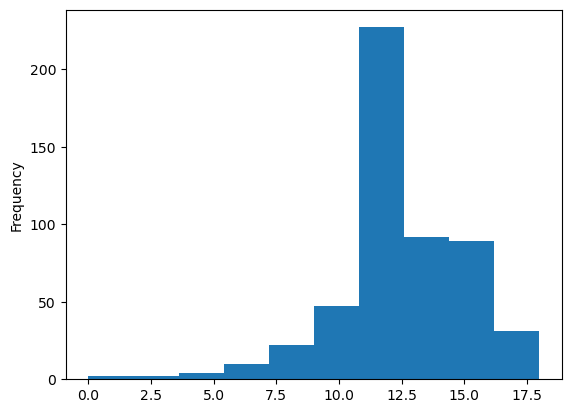

In [8]:
wage1['educ'].plot(kind = 'hist')

A person with no education is predicted to have an hourly wage of $-0.9. We got this result because the regression extrapolated

One more year of education is expected to increase predicted wage by $0.54

### 2.5 Voting Outcomes and Campaign Expenditures

In [9]:
wooldridge.data('vote1', description = True)

name of dataset: vote1
no of variables: 10
no of observations: 173

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| state    | state postal code               |
| district | congressional district          |
| democA   | =1 if A is democrat             |
| voteA    | percent vote for A              |
| expendA  | camp. expends. by A, $1000s     |
| expendB  | camp. expends. by B, $1000s     |
| prtystrA | % vote for president            |
| lexpendA | log(expendA)                    |
| lexpendB | log(expendB)                    |
| shareA   | 100*(expendA/(expendA+expendB)) |
+----------+---------------------------------+

From M. Barone and G. Ujifusa, The Almanac of American Politics, 1992.
Washington, DC: National Journal.


In [10]:
model05 = smf.ols('voteA ~ shareA', data = vote1).fit()
model05.params, model05.nobs

(Intercept    26.812214
 shareA        0.463827
 dtype: float64,
 173.0)

voteA and shareA are both percentages  
one more percentage point change in shareA results in almost half percentage point increase of total vote

### 2.6 CEO Salary and Return on Equity

In [11]:
df = wooldridge.data('ceosal1')
model06 = smf.ols('salary ~ roe', data = df).fit()

df['salary_hat'] = model06.fittedvalues
df['u'] = model06.resid
df[['roe', 'salary', 'salary_hat', 'u']].head(10)

,roe,salary,salary_hat,u
0,14.100000,1095,1224.058071,-129.058071
1,10.900000,1001,1164.854261,-163.854261
2,23.500000,1122,1397.969216,-275.969216
3,5.900000,578,1072.348338,-494.348338
4,13.800000,1368,1218.507712,149.492288
5,20.000000,1145,1333.215063,-188.215063
6,16.400000,1078,1266.610785,-188.610785
7,16.299999,1094,1264.760660,-170.760660
8,10.500000,1237,1157.453793,79.546207
9,26.299999,833,1449.772523,-616.772523


In [12]:
int(df['u'].sum())

0

The $\beta's$ are chosen to make sum of residuals = 0

### 2.7 Wage and Education

In [13]:
model07 = smf.ols('wage~educ', data=wage1).fit()
model07.params, model07.nobs

(Intercept   -0.904852
 educ         0.541359
 dtype: float64,
 526.0)

In [14]:
round(wage1['educ'].mean(),2), round(wage1['wage'].mean(),2)

(np.float64(12.56), np.float64(5.9))

In [15]:
new_data = pd.DataFrame({'educ': [12.56]})
model07.predict(new_data)

0    5.894621
dtype: float64

Rergerssion equation must pass through the mean points

### 2.8 CEO Salary and Return on Equity

In [16]:
model08 = smf.ols('salary ~ roe', data = ceosal1).fit()
model08.rsquared

np.float64(0.01318862408103405)

Firm return on equity explains 1.3% of the total variation in salary

### 2.9 Voting Outcomes and Campaign Expenditures

In [17]:
model09 = smf.ols('voteA ~ shareA', data = vote1).fit()
model09.rsquared

np.float64(0.8561408655827665)

Share of campaign expenditures explains 85% of the variation in the election outcome

### 2.10 A log Wage Equation

In [18]:
model010 = smf.ols('np.log(wage)~educ', data=wage1).fit()
model010.params, model010.nobs, model010.rsquared

(Intercept    0.583773
 educ         0.082744
 dtype: float64,
 526.0,
 np.float64(0.18580647728823507))

For every year of education, wage increases by $0.083 * 100 = 8.3\%$

Note: adding log allowed to get constant percentage change interpretation

### 2.11 CEO Salary and Firm Sales

In [19]:
model011 = smf.ols('np.log(salary) ~ np.log(sales)', data = ceosal1).fit()
model011.params

Intercept        4.821996
np.log(sales)    0.256672
dtype: float64

A 1% increase in firm sales increases CEO salary by about 0.257% [elasticity model]

### 2.12 Student Math Performance and the School Lunch Program

In [20]:
wooldridge.data('meap93', description = True)

name of dataset: meap93
no of variables: 17
no of observations: 408

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| lnchprg  | perc of studs in sch lnch prog  |
| enroll   | school enrollment               |
| staff    | staff per 1000 students         |
| expend   | expend. per stud, $             |
| salary   | avg. teacher salary, $          |
| benefits | avg. teacher benefits, $        |
| droprate | school dropout rate, perc       |
| gradrate | school graduation rate, perc    |
| math10   | perc studs passing MEAP math    |
| sci11    | perc studs passing MEAP science |
| totcomp  | salary + benefits               |
| ltotcomp | log(totcomp)                    |
| lexpend  | log of expend                   |
| lenroll  | log(enroll)                     |
| lstaff   | log(staff)                      |
| bensal   | benefits/salary                 |
| lsalary  | log(salary)              

In [21]:
model012 = smf.ols('math10 ~ lnchprg', data = meap93).fit()
model012.params

Intercept    32.142712
lnchprg      -0.318864
dtype: float64

If student eligibility in lunch program increases by 10 percentage points, his math results falls by 3.2 percentage points 

Note: nonsensical data, which shows that error term is correlated with the independent variable

### 2.13 Heteroskedasticity in a Wage Equation

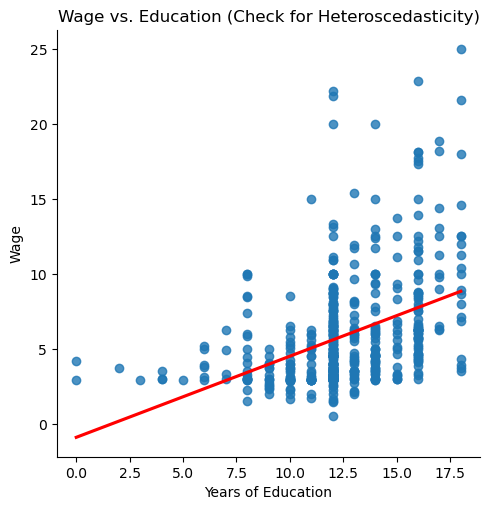

In [22]:
sns.lmplot(x='educ', y='wage', data=wage1, ci=None, line_kws={'color': 'red'})


plt.title('Wage vs. Education (Check for Heteroscedasticity)')
plt.xlabel('Years of Education')
plt.ylabel('Wage')
plt.show()

as years of education increases, variability in wage increases

### 2.14 Evaluating a Job Training Program

In [23]:
wooldridge.data('jtrain2', description = True)

name of dataset: jtrain2
no of variables: 19
no of observations: 445

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| train    | =1 if assigned to job training  |
| age      | age in 1977                     |
| educ     | years of education              |
| black    | =1 if black                     |
| hisp     | =1 if Hispanic                  |
| married  | =1 if married                   |
| nodegree | =1 if no high school degree     |
| mosinex  | # mnths prior to 1/78 in expmnt |
| re74     | real earns., 1974, $1000s       |
| re75     | real earns., 1975, $1000s       |
| re78     | real earns., 1978, $1000s       |
| unem74   | =1 if unem. all of 1974         |
| unem75   | =1 if unem. all of 1975         |
| unem78   | =1 if unem. all of 1978         |
| lre74    | log(re74); zero if re74 == 0    |
| lre75    | log(re75); zero if re75 == 0    |
| lre78    | log(re78); zero if re78 

In [24]:
model014 = smf.ols('re78 ~ train', data = jtrain2).fit()
model014.params, model014.rsquared

(Intercept    4.554802
 train        1.794343
 dtype: float64,
 np.float64(0.01782339297778035))

Workers who participated in the program earned $1790 more than those who did not, OLS assumptions are met due to random assignment

$R^2 = 1.8\%$ shows that $var(u) > var(y)$

## Computer Problems

### C1 The data in 401K
are a subset of data analyzed by Papke (1995) to study the relationship between participation in a 401(k) pension plan and the generosity of the plan.

 The variable prate is the percentage of eligible workers with an active account; this is the variable we would like to explain. 
 
The measure of generosity is the plan match rate, mrate. This variable gives the average amount the firm
contributes to each worker’s plan for each $1 contribution by the worker.

 For example, if mrate = 0.50, then a $1 contribution by the worker is matched by a 50¢ contribution by the firm

In [25]:
wooldridge.data('401k', description=True)

name of dataset: 401k
no of variables: 8
no of observations: 1534

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| prate    | participation rate, percent     |
| mrate    | 401k plan match rate            |
| totpart  | total 401k participants         |
| totelg   | total eligible for 401k plan    |
| age      | age of 401k plan                |
| totemp   | total number of firm employees  |
| sole     | = 1 if 401k is firm's sole plan |
| ltotemp  | log of totemp                   |
+----------+---------------------------------+

L.E. Papke (1995), “Participation in and Contributions to 401(k)
Pension Plans:Evidence from Plan Data,” Journal of Human Resources 30,
311-325. Professor Papke kindly provided these data. She gathered them
from the Internal Revenue Service’s Form 5500 tapes.


In [26]:
df = wooldridge.data('401k')
df.head()

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
0,26.100000,0.21,1653.0,6322.0,8,8709.0,0,9.072112
1,100.000000,1.42,262.0,262.0,6,315.0,1,5.752573
2,97.599998,0.91,166.0,170.0,10,275.0,1,5.616771
3,100.000000,0.42,257.0,257.0,7,500.0,0,6.214608
4,82.500000,0.53,591.0,716.0,28,933.0,1,6.838405


#### i. Find the average participation rate and the average match rate in the sample of plans

In [27]:
df['prate'].mean(), df['mrate'].mean()

(np.float64(87.3629074562948), np.float64(0.7315123849943027))

The average prate is $87.36$ and average mrate is $0.73$

#### (II) Now, estimate the simple regression equation and report the results along with the sample size and R-squared.

In [28]:
model = smf.ols(formula='prate ~ mrate', data = df).fit()

In [29]:
summary_df = pd.DataFrame({
    'term': model.params.index,
    'coefficient': model.params.values
})
summary_df['nobs'] = model.nobs
summary_df['rsquared'] = model.rsquared

summary_df

,term,coefficient,nobs,rsquared
0,Intercept,83.075455,1534.0,0.074703
1,mrate,5.861079,1534.0,0.074703


The intercept is 83.07, $\beta$ is 5.86, n = 1534, $R^2$ = 0.75

#### (iii) Interpret the intercept in your equation. Interpret the coefficient on mrate.


intercept = 83.75:- if mrate is zero, predicted participation rate is 83.05
mrate = 5.86:- one dollar increase in mrate will cause prate to increase by 5.86 (given the prate range allows this increase)

#### (iv) Find the predicted prate when mrate = 3.5. Is this a reasonable prediction? Explain what is happening here

In [30]:
new_data = pd.DataFrame({'mrate': [3.50]})
model.predict(new_data)

0    103.589233
dtype: float64

In [31]:
model.params['Intercept'] + model.params['mrate'] * 3.5

np.float64(103.58923260345671)

if mrate = 3.5, prate = 103.5 which isn't possible because prate is bounded by range 0 to 100

#### (v) How much of the variation in prate is explained by mrate? Is this a lot in your opinion?

In [32]:
model.rsquared * 100

np.float64(7.4703098402918)

The model explains 7.5% from the variation in prate, indicating the inlfuence of other factors on prate 

### The data set in CEOSAL2 
contains information on chief executive officers for U.S. corporations. The
variable salary is annual compensation, in thousands of dollars, and ceoten is prior number of years as company CEO

In [33]:
wooldridge.data('ceosal2', description= True)

name of dataset: ceosal2
no of variables: 15
no of observations: 177

+----------+--------------------------------+
| variable | label                          |
+----------+--------------------------------+
| salary   | 1990 compensation, $1000s      |
| age      | in years                       |
| college  | =1 if attended college         |
| grad     | =1 if attended graduate school |
| comten   | years with company             |
| ceoten   | years as ceo with company      |
| sales    | 1990 firm sales, millions      |
| profits  | 1990 profits, millions         |
| mktval   | market value, end 1990, mills. |
| lsalary  | log(salary)                    |
| lsales   | log(sales)                     |
| lmktval  | log(mktval)                    |
| comtensq | comten^2                       |
| ceotensq | ceoten^2                       |
| profmarg | profits as % of sales          |
+----------+--------------------------------+

See CEOSAL1.RAW


In [34]:
df = wooldridge.data('ceosal2')
df.head()

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
0,1161,49,1,1,9,2,6200.0,966,23200.0,7.057037,8.732305,10.051908,81,4,15.580646
1,600,43,1,1,10,10,283.0,48,1100.0,6.396930,5.645447,7.003066,100,100,16.961130
2,379,51,1,1,9,3,169.0,40,1100.0,5.937536,5.129899,7.003066,81,9,23.668638
3,651,55,1,0,22,22,1100.0,-54,1000.0,6.478509,7.003066,6.907755,484,484,-4.909091
4,497,44,1,1,8,6,351.0,28,387.0,6.208590,5.860786,5.958425,64,36,7.977208


#### (i) Find the average salary and the average tenure in the sample

In [35]:
df['salary'].mean(), df['ceoten'].mean()

(np.float64(865.8644067796611), np.float64(7.954802259887006))

Average salary is $865,864. Average years is about 8 years

#### (ii) How many CEOs are in their first year as CEO (that is, ceoten 5 0)? What is the longest tenure as a CEO?

In [36]:
(df['ceoten'] == 0).sum(), df['ceoten'].max()

(np.int64(5), 37)

There are five CEO with ceoten = 0, Longest ceoten is 37

#### (iii) Estimate the simple regression model $\log(\text{salary}) = \beta_0 + \beta_1 \text{ceoten} + u $ and report your results in the usual form. What is the (approximate) predicted percentage increase in salary given one more year as a CEO?


In [37]:
model = smf.ols(formula= 'np.log(salary) ~ ceoten', data=df).fit()
model.params, model.nobs, model.rsquared

(Intercept    6.505498
 ceoten       0.009724
 dtype: float64,
 177.0,
 np.float64(0.013162517743660396))

One more year of ceoten will increase salary by $0.0097 * 100 = 0.97\%$ 

### C3 Use the data in SLEEP75 
from Biddle and Hamermesh (1990) to study whether there is a tradeoff
between the time spent sleeping per week and the time spent in paid work.

 We could use either variable as the dependent variable. For concreteness, estimate the model
 $$ sleep = \beta_0 + \beta_1 totwrk + u $$
 where sleep is minutes spent sleeping at night per week and totwrk is total minutes worked during the week.

In [38]:
wooldridge.data('sleep75', description= True)

name of dataset: sleep75
no of variables: 34
no of observations: 706

+----------+--------------------------------+
| variable | label                          |
+----------+--------------------------------+
| age      | in years                       |
| black    | =1 if black                    |
| case     | identifier                     |
| clerical | =1 if clerical worker          |
| construc | =1 if construction worker      |
| educ     | years of schooling             |
| earns74  | total earnings, 1974           |
| gdhlth   | =1 if in good or excel. health |
| inlf     | =1 if in labor force           |
| leis1    | sleep - totwrk                 |
| leis2    | slpnaps - totwrk               |
| leis3    | rlxall - totwrk                |
| smsa     | =1 if live in smsa             |
| lhrwage  | log hourly wage                |
| lothinc  | log othinc, unless othinc < 0  |
| male     | =1 if male                     |
| marr     | =1 if married                  |
| prot    

In [39]:
df = wooldridge.data('sleep75')
df.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0.0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500.0,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500.0,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500.0,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500.0,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


#### (i) Report your results in equation form along with the number of observations and R2. What does the intercept in this equation mean?

In [40]:
model = smf.ols(formula= 'sleep ~ totwrk', data = df).fit()
model.params, model.nobs, model.rsquared

(Intercept    3586.376952
 totwrk         -0.150746
 dtype: float64,
 706.0,
 np.float64(0.10328737572903668))

Intercept is 3586.4:- if someone doesn't work, he will sleep on average 3586.4 minutes per week, or 59.7 hours per week meaning 8.5 hours per day

totwrk = -0.15:- for every minute a person spends working, his sleeping time is reduced by 0.15 minute

#### (ii) If totwrk increases by 2 hours, by how much is sleep estimated to fall? Do you find this to be a large effect?

In [41]:
model.params['totwrk']*120

np.float64(-18.08949889427928)

If a person works two more hours per week, his sleeping time will decrease by 18 minutes per week. Implying 2.57 minutes per day

### C4 Use the data in WAGE2 
to estimate a simple regression explaining monthly salary (wage) in terms of IQ score (IQ)

In [42]:
wooldridge.data('wage2', description= True)

name of dataset: wage2
no of variables: 17
no of observations: 935

+----------+-------------------------------+
| variable | label                         |
+----------+-------------------------------+
| wage     | monthly earnings              |
| hours    | average weekly hours          |
| IQ       | IQ score                      |
| KWW      | knowledge of world work score |
| educ     | years of education            |
| exper    | years of work experience      |
| tenure   | years with current employer   |
| age      | age in years                  |
| married  | =1 if married                 |
| black    | =1 if black                   |
| south    | =1 if live in south           |
| urban    | =1 if live in SMSA            |
| sibs     | number of siblings            |
| brthord  | birth order                   |
| meduc    | mother's education            |
| feduc    | father's education            |
| lwage    | natural log of wage           |
+----------+--------------------

In [43]:
df = wooldridge.data('wage2')
df.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502


#### (i) Find the average salary and average IQ in the sample. What is the sample standard deviation of IQ? (IQ scores are standardized so that the average in the population is 100 with a standard deviation equal to 15.)

In [44]:
df['wage'].mean(), df['IQ'].mean(), df['IQ'].std(ddof= 1)

(np.float64(957.9454545454546),
 np.float64(101.28235294117647),
 15.0526363702651)

Average salary is $957.95, Average IQ is 101.28. Sample standard deviation for IQ is 15.05

#### (ii) Estimate a simple regression model where a one-point increase in IQ changes wage by a constant dollar amount. Use this model to find the predicted increase in wage for an increase in IQ of 15 points. Does IQ explain most of the variation in wage?

In [45]:
model = smf.ols(formula= 'wage ~ IQ', data = df).fit()
model.params, model.nobs, model.rsquared

(Intercept    116.991565
 IQ             8.303064
 dtype: float64,
 935.0,
 np.float64(0.09553528456778504))

In [46]:
model.params['IQ']*15

np.float64(124.5459646235166)

According to the model results, an increase of IQ by 15 points will result into increase of salary by $124.5
IQ explains only 10% from the variation in wage 

(iii) Now, estimate a model where each one-point increase in IQ has the same percentage effect on wage. If IQ increases by 15 points, what is the approximate percentage increase in predicted wage?

In [47]:
model = smf.ols(formula= 'np.log(wage) ~ IQ', data = df).fit()
model.params, model.nobs, model.rsquared

(Intercept    5.886994
 IQ           0.008807
 dtype: float64,
 935.0,
 np.float64(0.09909129613279599))

In [48]:
model.params['IQ']*15 * 100

np.float64(13.210734614214326)

An increase of IQ by 15 points will result into increase of salary by 13.2%